# Automated Chest X-ray based Pneumonia Diagnosis by Fine Tuning a VGG16-based Model for the Task
This notebook is written by **Dr Raheel Siddiqi** on **06-06-2019**. This notebook presents an experiment to classify Chest X-ray images using *fine tuning*. The steps for fine-tuning a network are as follows:

1. Add the custom network on top of an already-trained base network.
2. Freeze the base network.
3. Train the part that has been added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part that has been added.

The diagnosis process comprises of classifying Chest X-ray images into one of the two classes: (a) Normal, and (b) Pneumonia. The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). The dataset has been downloded from [here](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia). 

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared. In order to account for any grading errors, the evaluation set was also checked by a third expert.

First I execute the first three steps (for fine tuning mentioned above) which are the same as *transfer learning*.

## Tensorflow and Keras version used

In [1]:
import tensorflow as tf
from tensorflow.python import keras

print('Tensorflow Version: ', tf.__version__)
print('Keras Version: ', keras.__version__)

Tensorflow Version:  1.13.1
Keras Version:  2.2.4-tf


## Setting up the Model

In [2]:
from tensorflow.python.keras.applications import VGG16

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [4]:
import os
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
filepath="VGG16_fine_tuning_part_1_Pneumonia_vs_Normal_best_model.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 18,910,530
Trainable params: 18,910,530
Non-trainable params: 0
_________________________________________________________________


## Setting up Training and Validation Data for the Experiment

In [6]:
image_height = 150
image_width = 150
batch_size = 10
no_of_epochs  = 50
number_of_training_samples=5216
number_of_test_samples=624

In [7]:
train_dir='D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\train'
validation_dir='D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\test'

In [8]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
training_set = train_datagen.flow_from_directory(train_dir,target_size=(image_width, image_height),batch_size=batch_size)

test_set = test_datagen.flow_from_directory(validation_dir,target_size=(image_width, image_height),batch_size=batch_size,shuffle=False)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Model Training

In [10]:
import math

history = model.fit_generator(
      training_set,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=no_of_epochs,
      callbacks=callbacks_list,
      validation_data=test_set,
      validation_steps=math.ceil(number_of_test_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
522/522 [==============================] - 159s 304ms/step - loss: 0.2270 - categorical_accuracy: 0.9059 - val_loss: 0.5023 - val_categorical_accuracy: 0.7660
Epoch 2/50
522/522 [==============================] - 129s 247ms/step - loss: 0.1335 - categorical_accuracy: 0.9473 - val_loss: 0.3993 - val_categorical_accuracy: 0.8926
Epoch 3/50
522/522 [==============================] - 128s 246ms/step - loss: 0.1142 - categorical_accuracy: 0.9567 - val_loss: 0.2673 - val_categorical_accuracy: 0.8942
Epoch 4/50
522/522 [==============================] - 128s 246ms/step - loss: 0.0995 - categorical_accuracy: 0.9615 - val_loss: 0.2177 - val_categorical_accuracy: 0.9327
Epoch 5/50
522/522 [==============================] - 128s 246ms/step - loss: 0.0904 - categorical_accuracy: 0.9678 - val_loss: 0.2278 - val_categorical_accuracy: 0.9327
Epoch 6/50
522/522 [==============================] - 128s 245ms/step - loss: 0.0864 - categorical_acc

## Visualizing the Training Process

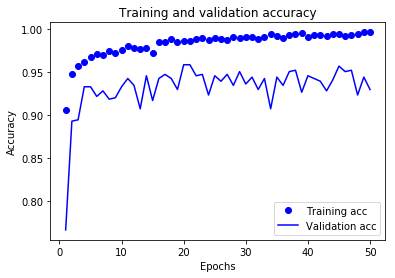

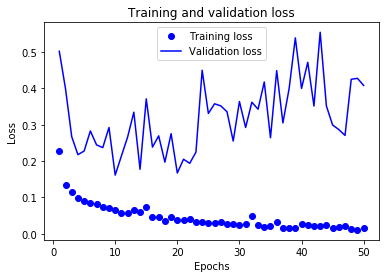

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('Pneumonia_vs_Normal_VGG16_Transfer_Learning_a',format='png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Pneumonia_vs_Normal_VGG16_Transfer_Learning_b',format='png')
plt.show()

## Loading the Best Model

In [12]:
from tensorflow.python.keras.models import load_model

best_model = load_model('VGG16_fine_tuning_part_1_Pneumonia_vs_Normal_best_model.h5')

## Evaluating the Best Model

In [13]:
steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_set, steps=steps_test,verbose=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

63/63 [==============================] - 7s 109ms/step - loss: 0.1614 - categorical_accuracy: 0.9327
Test-set classification accuracy: 93.27%


## Unfreeze Some Layers in the Convolutional Base
The first 3 steps of fine-tuning a network (mentioned above) have been completed. Now, I will unfreeze the `conv_base` and then freeze/unfreeze individual layers inside it. I will fine-tune the last three convolutional layers, which means all layers up to `block4_pool` should be frozen, and the layers `block5_conv1`, `block5_conv2`, and `block5_conv3` should be trainable.

In [14]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

## Jointly train both the Unfrozen Layers and the added Classifier

In [15]:
filepath="VGG16_fine_tuning_part_2_Pneumonia_vs_Normal_best_model.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

In [16]:
best_model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=5e-6),metrics=['categorical_accuracy'])

In [18]:
import math

history = best_model.fit_generator(
      training_set,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=no_of_epochs,
      callbacks=callbacks_list,
      validation_data=test_set,
      validation_steps=math.ceil(number_of_test_samples//batch_size))

Epoch 1/50
522/522 [==============================] - 129s 248ms/step - loss: 0.0363 - categorical_accuracy: 0.9868 - val_loss: 0.2158 - val_categorical_accuracy: 0.9407
Epoch 2/50
522/522 [==============================] - 128s 246ms/step - loss: 0.0254 - categorical_accuracy: 0.9927 - val_loss: 0.2367 - val_categorical_accuracy: 0.9455
Epoch 3/50
522/522 [==============================] - 128s 246ms/step - loss: 0.0266 - categorical_accuracy: 0.9918 - val_loss: 0.2896 - val_categorical_accuracy: 0.9375
Epoch 4/50
522/522 [==============================] - 145s 277ms/step - loss: 0.0196 - categorical_accuracy: 0.9937 - val_loss: 0.3036 - val_categorical_accuracy: 0.9423
Epoch 5/50
522/522 [==============================] - 132s 252ms/step - loss: 0.0210 - categorical_accuracy: 0.9923 - val_loss: 0.3023 - val_categorical_accuracy: 0.9375
Epoch 6/50
522/522 [==============================] - 153s 293ms/step - loss: 0.0168 - categorical_accuracy: 0.9941 - val_loss: 0.2574 - val_categoric

## Loading the Best Model after Fine Tuning

In [19]:
best_model_fine_tuned = load_model('VGG16_fine_tuning_part_2_Pneumonia_vs_Normal_best_model.h5')

## Evaluating the Best Model after Fine Tuning

In [21]:
steps_test=int(17540/32)
result = best_model_fine_tuned.evaluate_generator(test_set, steps=steps_test,verbose=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

63/63 [==============================] - 7s 104ms/step - loss: 0.2158 - categorical_accuracy: 0.9407
Test-set classification accuracy: 94.07%


## Calculating Precision, Specificity and Sensitivity (Recall) values for the model before and after Fine Tuning
Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. High precision relates to a low false positive rate, and high recall relates to a low false negative rate.

Precision is defined as the number of true positives over the number of true positives plus the number of false positives. Recall is defined as the number of true positives over the number of true positives plus the number of false negatives. Please see the [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html) for details.

Another way of assessing a binary classification model is to compute the sensitivity (also called the true positive rate or the recall) and specificity (also called the true negative rate) of the model. Sensitivity indicates the percentage of sick people who are correctly identified as having the condition. Specificity indicates the percentage of healthy people who are correctly identified as not having the condition.

But first we prepare our test data, so that later we can draw the confusion matrix as well as calculate precision, specificity and sensitivity (recall) of the model.

In [22]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

normal_cases_dir = Path('D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\test\\NORMAL')
pneumonia_cases_dir = Path('D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\test\\PNEUMONIA')

normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

test_data = []
test_labels = []

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)
                      
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)
    

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (624, 150, 150, 3)
Total number of labels: (624, 1)


In [23]:
# Evaluation on test dataset

test_loss, test_score = best_model_fine_tuned.evaluate(test_data, test_labels_one_hot_encoding, batch_size=16)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

624/624 [==============================] - 5s 7ms/sample - loss: 0.2130 - categorical_accuracy: 0.9439
Loss on test set:  0.21302216750859188
Accuracy on test set:  0.94391024


In [24]:
# Get predictions
preds = best_model_fine_tuned.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(624,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

624/624 [==============================] - 4s 6ms/sample
(624, 1)
(624, 1)


<Figure size 432x288 with 0 Axes>

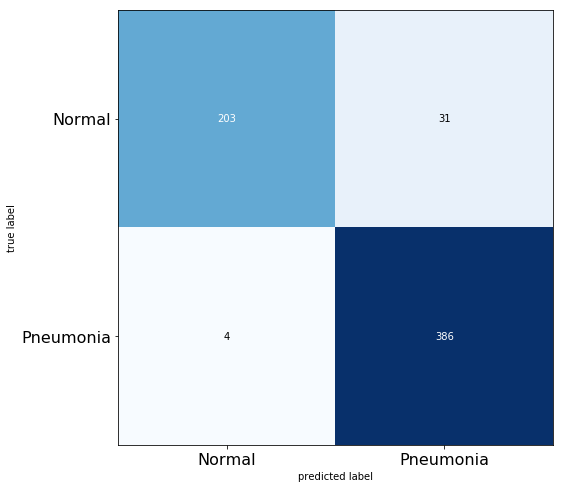

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [26]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity=tn/(tn+fp)

print("Sensitivity (Recall) of the model is {:.3f}".format(recall))
print("Specificity of the model is {:.3f}".format(specificity))
print("Precision of the model is {:.3f}".format(precision))

Sensitivity (Recall) of the model is 0.990
Specificity of the model is 0.868
Precision of the model is 0.926


## ROC Curve and AUC for the model

In [27]:
from sklearn.metrics import roc_curve

probs = best_model_fine_tuned.predict_proba(test_data)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(test_labels.ravel(), preds)

In [28]:
from sklearn.metrics import auc
auc_var = auc(fpr, tpr)

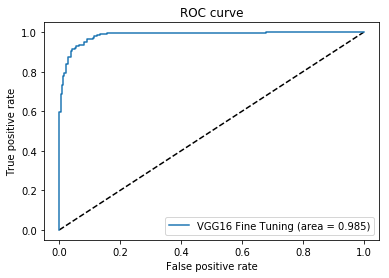

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='VGG16 Fine Tuning (area = {:.3f})'.format(auc_var))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Precision-Recall Curve for the Model

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

In [31]:
precision, recall, thresholds = precision_recall_curve(test_labels.ravel(), preds)

In [32]:
auc_var2 = auc(recall, precision)

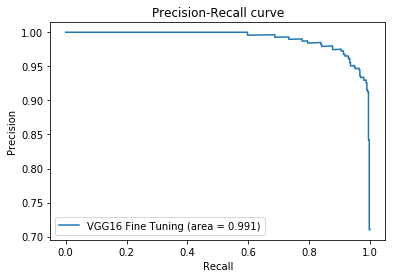

In [33]:
plt.figure()
plt.plot(recall, precision, label='VGG16 Fine Tuning (area = {:.3f})'.format(auc_var2))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()